In [2]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [4]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [5]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [6]:
SEED = 42

- 데이터 불러오기

In [7]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [8]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 2310), (12225, 2310))

In [9]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [10]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

Series([], dtype: int64)

In [11]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

Series([], dtype: int64)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [12]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 2309), (12225, 2309))

- 추가 피처 만들어 보기

In [13]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_지점코드_") ]

train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2312), (12225, 2312))

In [14]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_중분류_") ]

train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2315), (12225, 2315))

In [15]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_대분류_") ]

train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2318), (12225, 2318))

In [16]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_브랜드코드_") ]

train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2321), (12225, 2321))

In [17]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2324), (12225, 2324))

In [18]:
cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2327), (12225, 2327))

In [19]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2330), (12225, 2330))

In [20]:
cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2333), (12225, 2333))

In [21]:
cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

train_ft.shape, test_ft.shape

((14940, 2334), (12225, 2334))

## Feature Encoding

In [22]:
train_ft["첫구매날짜"] = pd.to_datetime(train_ft["첫구매날짜"])
train_ft["마지막구매날짜"] = pd.to_datetime(train_ft["마지막구매날짜"])
test_ft["첫구매날짜"] = pd.to_datetime(test_ft["첫구매날짜"])
test_ft["마지막구매날짜"] = pd.to_datetime(test_ft["마지막구매날짜"])

train_ft["첫구매년도"] = train_ft["첫구매날짜"].dt.year
train_ft["첫구매월"] = train_ft["첫구매날짜"].dt.month
train_ft["마지막구매년도"] = train_ft["마지막구매날짜"].dt.year
train_ft["마지막구매월"] = train_ft["마지막구매날짜"].dt.month

test_ft["첫구매년도"] = test_ft["첫구매날짜"].dt.year
test_ft["첫구매월"] = test_ft["첫구매날짜"].dt.month
test_ft["마지막구매년도"] = test_ft["마지막구매날짜"].dt.year
test_ft["마지막구매월"] = test_ft["마지막구매날짜"].dt.month

train_ft.shape, test_ft.shape

((14940, 2338), (12225, 2338))

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 주구매시간대, 선호브랜드코드, 고객등급

In [23]:
# %pip install category_encoders

In [24]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["주구매지점","주구매_대분류", "주구매시간대"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 2379), (12225, 2379))

In [25]:
ord_enc = OrdinalEncoder(categories=[['Normal', 'Black', 'Gold', 'Platinum', 'Diamond']])
train_ft["고객등급"] = ord_enc.fit_transform(train_ft[["고객등급"]])
test_ft["고객등급"] = ord_enc.transform(test_ft[["고객등급"]])

train_ft.shape, test_ft.shape

((14940, 2379), (12225, 2379))

In [26]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.shape, test_ft.shape

((14940, 2380), (12225, 2380))

In [27]:
combined_categories = pd.concat([train_ft['주구매_중분류'], test_ft['주구매_중분류']])

enc = ce.CountEncoder()
train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

train_ft.shape, test_ft.shape

((14940, 2381), (12225, 2381))

- 문자열 피처 삭제

In [28]:
cols = train_ft.select_dtypes(["object", "datetime", "category"]).columns.tolist()
cols

['첫구매날짜', '마지막구매날짜', '주구매지점', '선호브랜드코드', '주구매_중분류', '주구매_대분류']

In [29]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 2375), (12225, 2375))

In [30]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [31]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [32]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [33]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = Normalizer()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,마지막구매후_경과일,평균구매요일,주구매요일,월요일_구매비율,...,주구매시간대_13,주구매시간대_14,주구매시간대_15,주구매시간대_16,주구매시간대_17,주구매시간대_18,주구매시간대_19,주구매시간대_20,선호브랜드코드_cnt,주구매_중분류_cnt
0,0.000002,0.000044,4.882935e-06,3.487811e-07,2.712742e-07,3.966476e-06,1.813662e-05,5.231716e-07,3.487811e-07,1.245647e-08,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.743905e-07,4.115617e-05
1,0.000004,0.000062,2.808655e-06,1.755409e-07,3.510818e-07,2.060698e-06,5.266228e-07,4.054159e-07,5.266228e-07,8.359092e-09,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1.755409e-07,0.0,0.0,1.237739e-03,9.145682e-05
2,0.000002,0.000014,2.406774e-07,4.412419e-07,7.439119e-08,2.013662e-07,1.604516e-07,9.359676e-08,0.000000e+00,1.022486e-08,...,0.0,0.0,4.011290e-08,0.000000e+00,0.0,0.000000e+00,0.0,0.0,3.209032e-07,5.615806e-07
3,0.000002,0.000008,7.147265e-08,4.526601e-07,4.897200e-08,7.474003e-08,2.382422e-07,7.340434e-08,9.529686e-08,1.802914e-09,...,0.0,0.0,2.382422e-08,0.000000e+00,0.0,0.000000e+00,0.0,0.0,5.122206e-06,1.112353e-04
4,0.000003,0.000037,1.527952e-06,7.052086e-07,1.763022e-07,1.406037e-06,5.171530e-06,4.538148e-07,4.701391e-07,9.794564e-09,...,0.0,0.0,0.000000e+00,1.175348e-07,0.0,0.000000e+00,0.0,0.0,8.287377e-04,2.408287e-04


# 특성 중요도 파악

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.432189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169160
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1688
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


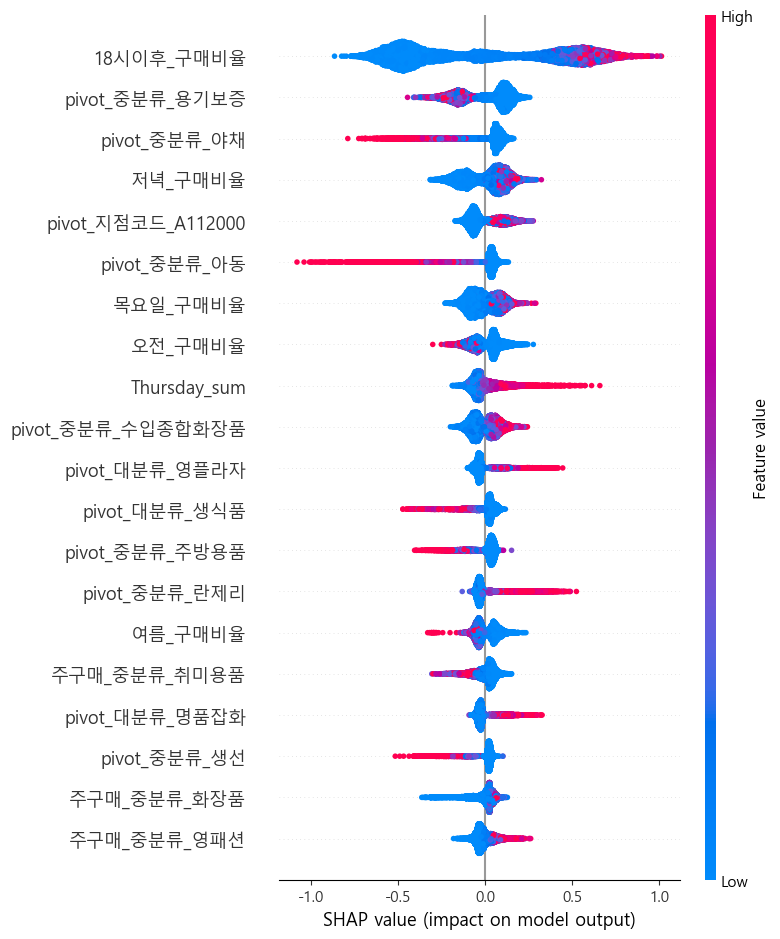

In [35]:
import shap
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
model.fit(train_ft, target)

explainer = shap.Explainer(model)
shap_values = explainer(train_ft)
shap.summary_plot(shap_values, train_ft)

# 모델 선택

In [45]:
from tabnanny import verbose


params = {
    "learning_rate": 0.05,
    "max_depth": -1,
    "min_child_samples": 50,
    "n_estimators": 300,
    "num_leaves": 31,
}

model = LGBMClassifier(**params, random_state=SEED, verbose=0)

In [48]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(train_ft, target, test_size=0.2, random_state=SEED)
model.fit(X_train, y_train)
print(classification_report(y_valid, model.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      1801
         1.0       0.69      0.60      0.64      1187

    accuracy                           0.73      2988
   macro avg       0.72      0.71      0.72      2988
weighted avg       0.73      0.73      0.73      2988



In [680]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63],
    'min_child_samples': [20, 50]
}

grid_search = GridSearchCV(
    LGBMClassifier(random_state=SEED),
    param_grid,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(train_ft, target)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165421
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1367
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
Best parameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 50, 'n_estimators': 300, 'num_leaves': 31}
Best cross-validation score: 0.7251038972694498


In [681]:
# 최적 파라미터 확인
print("Best parameters:", grid_search.best_params_)
print("기존 CV 점수:", 0.722)
print("향상된 CV 점수:", grid_search.best_score_)
print("성능 향상도:", round((grid_search.best_score_ - 0.722) * 100, 2), "%")

# 최적 파라미터로 모델 학습
best_model = LGBMClassifier(**grid_search.best_params_, random_state=SEED)
best_model.fit(train_ft, target)

# 새로운 예측
pred = best_model.predict(test_ft)
submit["target"] = pred
submit.to_csv(f"{DATA_PATH}submit_tuned.csv", index=False)

Best parameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 50, 'n_estimators': 300, 'num_leaves': 31}
기존 CV 점수: 0.722
향상된 CV 점수: 0.7251038972694498
성능 향상도: 0.31 %
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165421
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1367
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


# cv 점수 확인해보기

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
cross_val_score(LGBMClassifier(random_state=42), train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

0.7206817828116859

In [ ]:
params = {
    "learning_rate": 0.05,
    "max_depth": -1,
    "min_child_samples": 50,
    "n_estimators": 300,
    "num_leaves": 31,
}

model = LGBMClassifier(**params, random_state=SEED)
model.fit(train_ft, target)
pred = model.predict(test_ft)
submit["target"] = pred

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165421
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1367
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


# 모델 학습

In [561]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169415
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1689
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

# 테스트 데이터 예측

In [562]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [563]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [564]:
submit

,ID,target
0,test_0,0.5
1,test_1,0.5
2,test_2,0.5
3,test_3,0.5
4,test_4,0.5
...,...,...
12220,test_12220,0.5
12221,test_12221,0.5
12222,test_12222,0.5
12223,test_12223,0.5


In [565]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [38]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)